# If you are reading this on Github...

* Links within notebooks (except for link at the end) **may not work properly**!

# Overview

#### Aim: Predicting customer expenditure using customer information ([Source of dataset (Kaggle)](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis))
#### What we going to do in this notebook:
1. Clean dataset
2. Give jusdification for every action

# Data Cleaning

## (0) Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
def histogramCountOld(dataset,x,axes = [],i = 0,j = 0,meta = {"height": 4.8, "width": 6.4}):
    
    import seaborn as sb
    
    f = plt.figure(figsize=(meta["height"],meta["width"]))
    
    #Cite M2 ExploratoryAnalysis
    print("Number of", x ,":", len(dataset[x].unique()))
    
    print(dataset[x].value_counts())
    if(len(axes) != 0):
        sb.countplot(y=x, data=dataset, ax = axes[i,j], orient = "h")
    else:
        sb.catplot(y = x, data = dataset, kind = "count")

In [3]:
customerData = pd.read_csv('dataset\marketing_campaign.csv',sep='\t')

In [4]:
customerData

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


We copy the dataset before doing cleaning.

In [5]:
customerData_Clean = customerData.copy()

## (1) Data Cleaning: Removing NULL Data in Income Column

We realise there are some NULL data in income column, as shown below.

In [6]:
null_Income = customerData_Clean[customerData_Clean["Income"].isnull() == True]
print(null_Income.index)
print(len(null_Income.index))

Int64Index([  10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,
             312,  319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081,
            2084, 2228],
           dtype='int64')
24


After checking the number of NULL data, we decide to remove it because there are only a few of NULL Data, and filling median may affect the data as well.

In [7]:
print(null_Income.index.tolist())
customerData_Clean.drop(index = null_Income.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[10, 27, 43, 48, 58, 71, 90, 91, 92, 128, 133, 312, 319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081, 2084, 2228]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2212,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2213,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2214,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## (2) <a name="addingCol"></a>Data Cleaning: Adding columns - Grocery Products, Total Purchase, AcceptedCmp, Year Distribution

As mentioned in [exploratory](Data-exploratory.ipynb) notebook, we decide to introduce 4 new variables to our dataset:

#### (1) MntGroceryProducts -  
Amount spent on groceries (fruits, meat, fish and sweets) in last 2 years.

#### (2) TotalPurchase -  
Total number of purchases made by the customers in this store.

#### (3) YearRange -  
Categorise customer's birth year into every 10 year.  

#### (4) TotalChild -  
Customers' total number of children.

#### (5) HaveChild -  
1 if customer have children, 0 otherwise
  
##### We decide to adding these variables, because  
(1) this helps with the training later. (MntGroceryProducts, TotalPurchase)  
(2) some columns does not give enough meaning, so we combine them to have a better feeling about what they really mean (AcceptedCmp, YearRange, TotalChild, HaveChild)

In [8]:
customerData_Clean.loc[:,'MntGroceryProducts'] = customerData_Clean['MntMeatProducts'] + customerData_Clean['MntFishProducts'] + customerData_Clean['MntFruits']
customerData_Clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,806
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,9
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,287
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,34
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,267
2212,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,30
2213,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,297
2214,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,324


In [9]:
customerData_Clean.loc[:,'TotalPurchase'] = customerData_Clean['NumDealsPurchases'] + customerData_Clean['NumWebPurchases'] + customerData_Clean['NumCatalogPurchases'] + customerData_Clean['NumStorePurchases']
customerData_Clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,806,25
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,9,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,287,21
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,34,8
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,207,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,267,18
2212,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,30,22
2213,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,297,19
2214,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,324,23


In [10]:
customerData_Clean['YearRange'] = customerData_Clean["Year_Birth"] / 10
customerData_Clean['YearRange'] = customerData_Clean['YearRange'].astype("int64")
customerData_Clean['YearRange'] = customerData_Clean["YearRange"] * 10
customerData_Clean['YearRange'] = customerData_Clean['YearRange'].astype("category")
customerData_Clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase,YearRange
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,806,25,1950
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,9,6,1950
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,287,21,1960
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,34,8,1980
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,207,19,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,267,18,1960
2212,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,30,22,1940
2213,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,297,19,1980
2214,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,324,23,1950


In [11]:
customerData_Clean.loc[:,'TotalChild'] = customerData_Clean['Kidhome'].astype("int64") + customerData_Clean['Teenhome'].astype("int64")
customerData_Clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase,YearRange,TotalChild
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,806,25,1950,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,9,6,1950,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,287,21,1960,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,34,8,1980,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,207,19,1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,3,11,0,267,18,1960,1
2212,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,1,0,0,3,11,0,30,22,1940,3
2213,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,3,11,0,297,19,1980,0
2214,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,3,11,0,324,23,1950,1


In [12]:
customerData_Clean.loc[:,'HaveChild'] = customerData_Clean["TotalChild"]
customerData_Clean = customerData_Clean.replace({'HaveChild': {2: 1,3: 1}})
customerData_Clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,806,25,1950,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,9,6,1950,2,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,287,21,1960,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,34,8,1980,1,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,207,19,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,3,11,0,267,18,1960,1,1
2212,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,3,11,0,30,22,1940,3,1
2213,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,3,11,0,297,19,1980,0,0
2214,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,3,11,0,324,23,1950,1,1


In [13]:
customerData_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2216 non-null   int64   
 1   Year_Birth           2216 non-null   int64   
 2   Education            2216 non-null   object  
 3   Marital_Status       2216 non-null   object  
 4   Income               2216 non-null   float64 
 5   Kidhome              2216 non-null   int64   
 6   Teenhome             2216 non-null   int64   
 7   Dt_Customer          2216 non-null   object  
 8   Recency              2216 non-null   int64   
 9   MntWines             2216 non-null   int64   
 10  MntFruits            2216 non-null   int64   
 11  MntMeatProducts      2216 non-null   int64   
 12  MntFishProducts      2216 non-null   int64   
 13  MntSweetProducts     2216 non-null   int64   
 14  MntGoldProds         2216 non-null   int64   
 15  NumDealsPurchases    

## <a name="removeCol"></a>(3) Data Cleaning: Remove column ID, Z_CostContact, Z_Revenue, Campaign Related Variable, Complain, Dt_Customer

We drop all the variables that does not help with the prediction, such as:  

#### (1) ID -  
Customers' unique identifier. Does not reflect anything about customers.

#### (2) Z_CostContact,Z_Revenue -  
No description is given for these variables from the sources. We decide to ignore them as we know little things about these variables.

#### (3) Campaign-related variable -  
As we do not know what the store did during the offer, it is hard to tell anything from these variables. Hence, we just remove them.

#### (4) Complain - 
The data is too imbalance for us to conclude anything, as shown in [here](Data-exploratory.ipynb#Complain).

#### (5) Dt_Customer - 
This data shows the date of customer's enrollment with the company, which does not mean anything about customers themselves.

In [14]:
dropColumn = ["ID","Z_CostContact","Z_Revenue","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response","Complain","Dt_Customer"]
customerData_Clean.drop(dropColumn,inplace= True,axis = 1)

In [15]:
customerData_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2216 non-null   int64   
 1   Education            2216 non-null   object  
 2   Marital_Status       2216 non-null   object  
 3   Income               2216 non-null   float64 
 4   Kidhome              2216 non-null   int64   
 5   Teenhome             2216 non-null   int64   
 6   Recency              2216 non-null   int64   
 7   MntWines             2216 non-null   int64   
 8   MntFruits            2216 non-null   int64   
 9   MntMeatProducts      2216 non-null   int64   
 10  MntFishProducts      2216 non-null   int64   
 11  MntSweetProducts     2216 non-null   int64   
 12  MntGoldProds         2216 non-null   int64   
 13  NumDealsPurchases    2216 non-null   int64   
 14  NumWebPurchases      2216 non-null   int64   
 15  NumCatalogPurchases  

## Converting to categorical for visualization

Before we continue, we convert some variables' data types to category for the ease of visualization.

In [16]:
colOfNum = []
colOfCat = []
for col in customerData_Clean:
    if str(customerData_Clean[col].dtypes) != "int64" and str(customerData_Clean[col].dtypes) != "float64":
        colOfCat.append(str(col))
    else:
        colOfNum.append(str(col))
        
colOfCat.extend(['Kidhome','Teenhome','HaveChild'])

for element in ['Kidhome','Teenhome','HaveChild']:
    colOfNum.remove(element)
    
print("Column which consider as Numerical Data:\n", colOfNum)
print()
print("Column which consider as Categorical Data:\n",colOfCat)

Column which consider as Numerical Data:
 ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntGroceryProducts', 'TotalPurchase', 'TotalChild']

Column which consider as Categorical Data:
 ['Education', 'Marital_Status', 'YearRange', 'Kidhome', 'Teenhome', 'HaveChild']


## (4) Data Cleaning: Cleaning Marital Status 

As mentioned in [exploratory](Data-exploratory.ipynb#Marital_Status) notebook, some categories are self-explanatory, but some does not make sense, like Absurd and YOLO. At the same time, some categories have the same meaning as others, like Single and Alone.

Number of Marital_Status : 8
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


<Figure size 345.6x460.8 with 0 Axes>

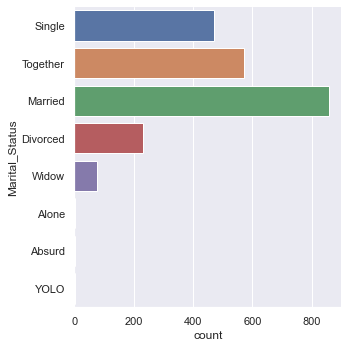

In [17]:
histogramCountOld(customerData_Clean, "Marital_Status")

Hence, we decide to do two things on this variable. 

1. Remove Strange Response - Absurd and YOLO 
2. Combine Alone + Single, Married + Together, Widow + Divorced

#### (a) Remove Strange Response - Absurd and YOLO 

In [18]:
deleteData = customerData_Clean.loc[(customerData_Clean.Marital_Status == "Absurd") | (customerData_Clean.Marital_Status == "YOLO")]
print(deleteData.index.tolist())
customerData_Clean.drop(index = deleteData.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[2070, 2111, 2154, 2179]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,3,8,10,4,7,806,25,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,1,1,2,5,9,6,1950,2,1
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,1,8,2,10,4,287,21,1960,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,2,2,0,4,6,34,8,1980,1,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,5,3,6,5,207,19,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,2,9,3,4,5,267,18,1960,1,1
2208,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,8,2,5,7,30,22,1940,3,1
2209,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,1,2,3,13,6,297,19,1980,0,0
2210,1956,Master,Together,69245.0,0,1,8,428,30,214,...,2,6,5,10,3,324,23,1950,1,1


#### (b) Combine Alone + Single, Married + Together, Widow + Divorced

In [19]:
customerData_Clean = customerData_Clean.replace({'Marital_Status': {'Alone': 'Single','Together': 'Married','Widow': 'Divorced'}})

#### After cleaning:

Number of Marital_Status : 3
Married     1430
Single       474
Divorced     308
Name: Marital_Status, dtype: int64


<Figure size 345.6x460.8 with 0 Axes>

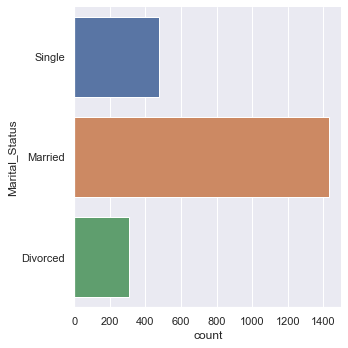

In [20]:
histogramCountOld(customerData_Clean, "Marital_Status")

## (5) Data Cleaning: Remove Outliers of Year Range

As shown in the graph below, there are some outliers in this variable.   
To help with the training later, we decide to remove 1890 and 1900 as there are not a lot of data in these categories too.

Number of YearRange : 8
1970    731
1960    502
1950    452
1980    358
1940    106
1990     60
1890      2
1900      1
Name: YearRange, dtype: int64


<Figure size 345.6x460.8 with 0 Axes>

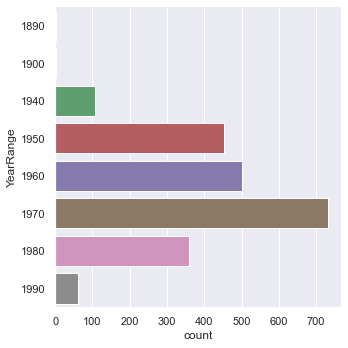

In [21]:
histogramCountOld(customerData_Clean, "YearRange")

In [22]:
deleteData = customerData_Clean.loc[(customerData_Clean.YearRange == 1890) | (customerData_Clean.YearRange == 1900)]
print(deleteData.index.tolist())
customerData_Clean.drop(index = deleteData.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[181, 228, 326]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,3,8,10,4,7,806,25,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,1,1,2,5,9,6,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,26,426,49,127,...,1,8,2,10,4,287,21,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,26,11,4,20,...,2,2,0,4,6,34,8,1980,1,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,5,3,6,5,207,19,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,2,9,3,4,5,267,18,1960,1,1
2205,1946,PhD,Married,64014.0,2,1,56,406,0,30,...,7,8,2,5,7,30,22,1940,3,1
2206,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,1,2,3,13,6,297,19,1980,0,0
2207,1956,Master,Married,69245.0,0,1,8,428,30,214,...,2,6,5,10,3,324,23,1950,1,1


#### After cleaning:

Number of YearRange : 6
1970    731
1960    502
1950    452
1980    358
1940    106
1990     60
1890      0
1900      0
Name: YearRange, dtype: int64


<Figure size 345.6x460.8 with 0 Axes>

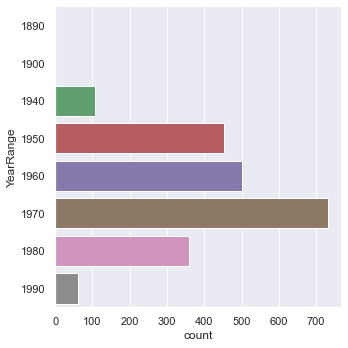

In [23]:
histogramCountOld(customerData_Clean, "YearRange")

## (6) Data Cleaning: Remove Outliers in Income Column

As shown in the following graph, there are some outliers in the income column.   

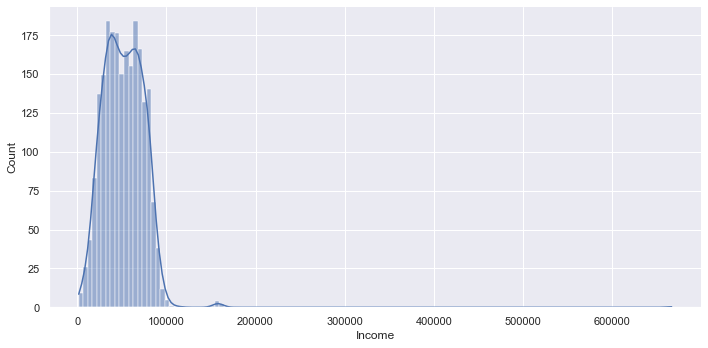

In [24]:
sb.displot(customerData_Clean["Income"], kde = True, aspect = 2)

<Figure size 144x432 with 0 Axes>

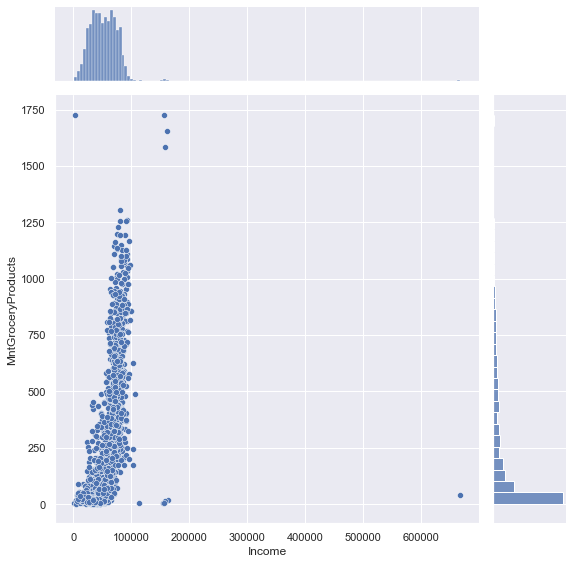

In [25]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGroceryProducts", height = 8)

We decide to remove top 1% of the customers, as they do not represent most of the customers.

In [26]:
customerData_Clean["Income"].quantile(q=0.99)

94464.96

In [27]:
outliers_Income = customerData_Clean[customerData_Clean["Income"] >= customerData_Clean["Income"].quantile(q=0.99)]
outliers_Income

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
115,1983,Graduation,Single,101970.0,0,0,69,722,27,102,...,0,6,8,13,2,173,27,1980,0,0
153,1973,PhD,Married,157243.0,0,1,98,20,2,1582,...,15,0,22,0,0,1585,37,1970,1,1
191,1977,PhD,Married,102160.0,0,0,54,763,29,138,...,0,7,9,10,4,243,26,1970,0,0
239,1974,Graduation,Divorced,102692.0,0,0,5,168,148,444,...,1,6,9,13,2,624,29,1970,0,0
601,1976,PhD,Married,162397.0,1,1,31,85,1,16,...,0,0,0,1,1,19,1,1970,2,1
630,1970,Graduation,Married,105471.0,0,0,36,1009,181,104,...,0,9,8,13,3,487,30,1970,0,0
634,1960,Master,Single,98777.0,0,0,23,1000,19,711,...,0,4,6,9,1,855,19,1960,0,0
639,1975,Graduation,Divorced,153924.0,0,0,81,1,1,1,...,0,0,0,0,0,3,0,1970,0,0
671,1982,PhD,Married,160803.0,0,0,21,55,16,1622,...,15,0,28,1,0,1655,44,1980,0,0
898,1994,Graduation,Single,95529.0,0,0,29,770,29,890,...,1,7,3,7,3,1169,18,1990,0,0


In [28]:
print(outliers_Income.index.tolist())
customerData_Clean.drop(index = outliers_Income.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[115, 153, 191, 239, 601, 630, 634, 639, 671, 898, 985, 1097, 1284, 1453, 1633, 1878, 1938, 1962, 1973, 1975, 1992, 2105, 2202]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,3,8,10,4,7,806,25,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,1,1,2,5,9,6,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,26,426,49,127,...,1,8,2,10,4,287,21,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,26,11,4,20,...,2,2,0,4,6,34,8,1980,1,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,5,3,6,5,207,19,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,2,9,3,4,5,267,18,1960,1,1
2182,1946,PhD,Married,64014.0,2,1,56,406,0,30,...,7,8,2,5,7,30,22,1940,3,1
2183,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,1,2,3,13,6,297,19,1980,0,0
2184,1956,Master,Married,69245.0,0,1,8,428,30,214,...,2,6,5,10,3,324,23,1950,1,1


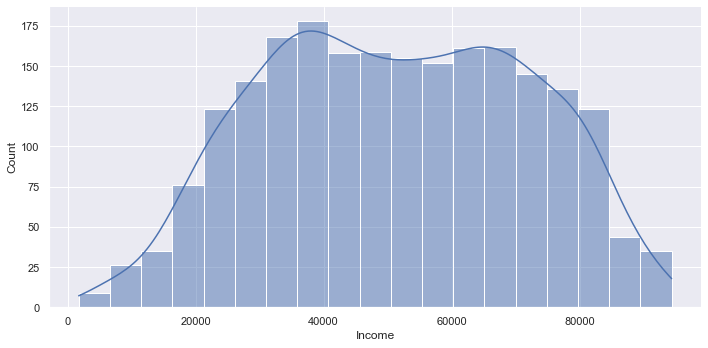

In [29]:
sb.displot(customerData_Clean["Income"], kde = True, aspect = 2)

## (7) Data Cleaning: Remove Outliers in MntGroceryProducts Column

As shown in graph, there are one outlier in MntGroceryProducts. This outlier make no sense, as a person which has low income should not be able to purchase more grocery products than those who are rich.  
Hence, we just remove it.

<Figure size 144x432 with 0 Axes>

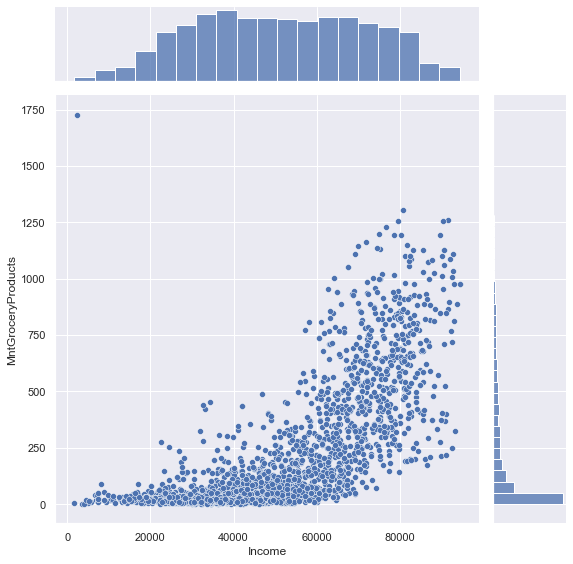

In [30]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGroceryProducts", height = 8)

In [31]:
outliers_Grocery = pd.DataFrame(customerData_Clean[customerData_Clean["MntGroceryProducts"] >= 1500])
outliers_Grocery

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
20,1979,Graduation,Married,2447.0,1,0,42,1,1,1725,...,15,0,28,0,1,1727,43,1970,1,1


In [32]:
print(outliers_Grocery.index.tolist())
customerData_Clean.drop(index = outliers_Grocery.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[20]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,3,8,10,4,7,806,25,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,1,1,2,5,9,6,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,26,426,49,127,...,1,8,2,10,4,287,21,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,26,11,4,20,...,2,2,0,4,6,34,8,1980,1,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,5,3,6,5,207,19,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,2,9,3,4,5,267,18,1960,1,1
2181,1946,PhD,Married,64014.0,2,1,56,406,0,30,...,7,8,2,5,7,30,22,1940,3,1
2182,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,1,2,3,13,6,297,19,1980,0,0
2183,1956,Master,Married,69245.0,0,1,8,428,30,214,...,2,6,5,10,3,324,23,1950,1,1


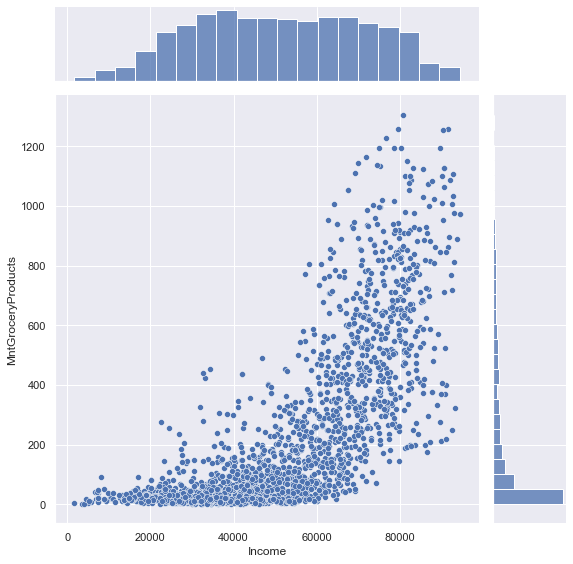

In [33]:
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGroceryProducts", height = 8)

## (8) Data Cleaning: Remove Outliers in MntGoldProducts Column

As shown in graph, there are some outliers in MntGroldProducts. These outliers make no sense, as a person which has low income should not be able to purchase so many gold products than those who are rich.  
Hence, we just remove it.

<Figure size 144x432 with 0 Axes>

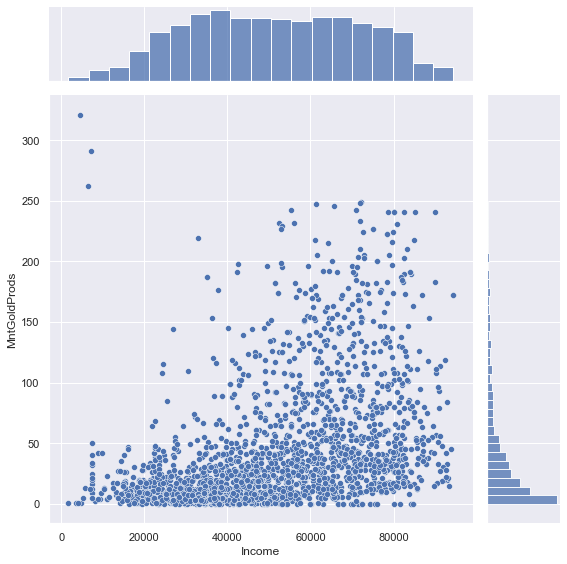

In [34]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGoldProds", height = 8)

In [35]:
outliers_Gold = pd.DataFrame()
outliers_Gold = customerData_Clean.loc[(customerData_Clean.MntGoldProds >= 250) & (customerData_Clean.Income <= 20000)]
outliers_Gold

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
1298,1982,Master,Single,6560.0,0,0,2,67,11,26,...,0,1,0,1,17,41,2,1980,0,0
1770,1966,PhD,Single,7144.0,0,2,92,81,4,33,...,0,23,1,1,0,42,25,1960,2,1
1937,1969,Graduation,Married,4428.0,0,1,0,16,4,12,...,0,25,0,0,1,18,25,1960,1,1


In [36]:
print(outliers_Gold.index.tolist())
customerData_Clean.drop(index = outliers_Gold.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[1298, 1770, 1937]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,3,8,10,4,7,806,25,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,1,1,2,5,9,6,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,26,426,49,127,...,1,8,2,10,4,287,21,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,26,11,4,20,...,2,2,0,4,6,34,8,1980,1,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,5,3,6,5,207,19,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,2,9,3,4,5,267,18,1960,1,1
2178,1946,PhD,Married,64014.0,2,1,56,406,0,30,...,7,8,2,5,7,30,22,1940,3,1
2179,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,1,2,3,13,6,297,19,1980,0,0
2180,1956,Master,Married,69245.0,0,1,8,428,30,214,...,2,6,5,10,3,324,23,1950,1,1


<Figure size 144x432 with 0 Axes>

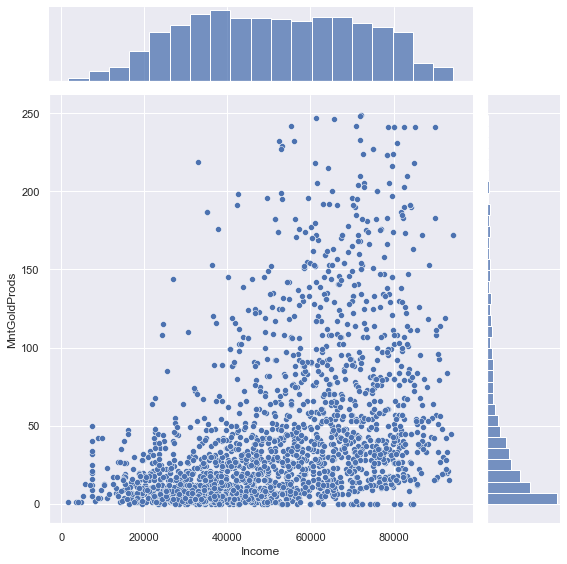

In [37]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGoldProds", height = 8)

##  <a name="removeOutliersWeb"></a>(9) Data Cleaning: Removing outliers in NumWebVisitsMonth

As mentioned in the [exploratory](Data-exploratory.ipynb#NumWebVisitsMonth) notebook, there are some outliers in this variable.  
As there are not a lot, we decide to just remove them to help with the training later.

Number of NumWebVisitsMonth : 15
7     386
8     338
6     334
5     277
4     215
3     201
2     195
1     138
9      82
0       5
20      3
10      3
14      2
19      2
13      1
Name: NumWebVisitsMonth, dtype: int64


<Figure size 345.6x460.8 with 0 Axes>

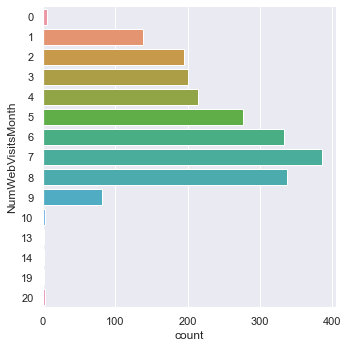

In [38]:
histogramCountOld(customerData_Clean, "NumWebVisitsMonth")

In [39]:
outliers_Web = customerData_Clean.loc[(customerData_Clean.NumWebVisitsMonth >= 10) | (customerData_Clean.NumWebVisitsMonth == 0)]
outliers_Web

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
9,1950,PhD,Married,5648.0,1,1,68,28,0,6,...,1,1,0,0,20,7,2,1950,2,1
43,1968,Graduation,Married,41728.0,1,0,92,13,6,15,...,1,2,0,2,10,24,5,1960,1,1
584,1986,Master,Single,21888.0,1,0,15,88,10,46,...,4,5,1,2,10,58,12,1980,1,1
748,1957,PhD,Married,6835.0,0,1,76,107,2,12,...,0,0,0,1,20,16,1,1950,1,1
879,1977,Graduation,Single,85072.0,0,0,94,494,92,391,...,1,3,4,10,0,677,18,1970,0,0
948,1962,Graduation,Married,83715.0,0,0,2,318,8,407,...,1,2,8,13,0,565,24,1960,0,0
954,1965,Graduation,Divorced,4861.0,0,0,20,2,1,1,...,0,0,0,0,14,3,0,1960,0,0
1014,1991,Graduation,Single,8028.0,0,0,62,73,18,66,...,15,0,1,0,19,91,16,1990,0,0
1216,1971,Graduation,Divorced,1730.0,0,0,65,1,1,3,...,15,0,0,0,20,5,15,1970,0,0
1488,1973,Graduation,Single,3502.0,1,0,56,2,1,1,...,0,0,0,0,14,2,0,1970,1,1


In [40]:
print(outliers_Web.index.tolist())
customerData_Clean.drop(index = outliers_Web.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[9, 43, 584, 748, 879, 948, 954, 1014, 1216, 1488, 1736, 1808, 1830, 1871, 1916, 2158]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,3,8,10,4,7,806,25,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,1,1,2,5,9,6,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,26,426,49,127,...,1,8,2,10,4,287,21,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,26,11,4,20,...,2,2,0,4,6,34,8,1980,1,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,5,3,6,5,207,19,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,2,9,3,4,5,267,18,1960,1,1
2162,1946,PhD,Married,64014.0,2,1,56,406,0,30,...,7,8,2,5,7,30,22,1940,3,1
2163,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,1,2,3,13,6,297,19,1980,0,0
2164,1956,Master,Married,69245.0,0,1,8,428,30,214,...,2,6,5,10,3,324,23,1950,1,1


Number of NumWebVisitsMonth : 9
7    386
8    338
6    334
5    277
4    215
3    201
2    195
1    138
9     82
Name: NumWebVisitsMonth, dtype: int64


<Figure size 345.6x460.8 with 0 Axes>

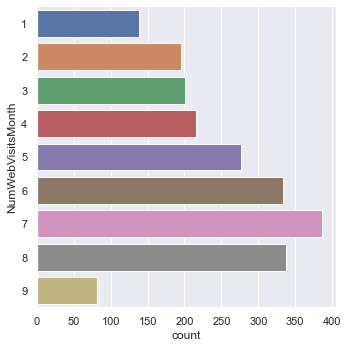

In [41]:
histogramCountOld(customerData_Clean, "NumWebVisitsMonth")

## Cleaning Done, Details show below:

In [42]:
customerData_Clean

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,3,8,10,4,7,806,25,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,1,1,2,5,9,6,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,26,426,49,127,...,1,8,2,10,4,287,21,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,26,11,4,20,...,2,2,0,4,6,34,8,1980,1,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,5,3,6,5,207,19,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,2,9,3,4,5,267,18,1960,1,1
2162,1946,PhD,Married,64014.0,2,1,56,406,0,30,...,7,8,2,5,7,30,22,1940,3,1
2163,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,1,2,3,13,6,297,19,1980,0,0
2164,1956,Master,Married,69245.0,0,1,8,428,30,214,...,2,6,5,10,3,324,23,1950,1,1


In [43]:
customerData_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2166 non-null   int64   
 1   Education            2166 non-null   object  
 2   Marital_Status       2166 non-null   object  
 3   Income               2166 non-null   float64 
 4   Kidhome              2166 non-null   int64   
 5   Teenhome             2166 non-null   int64   
 6   Recency              2166 non-null   int64   
 7   MntWines             2166 non-null   int64   
 8   MntFruits            2166 non-null   int64   
 9   MntMeatProducts      2166 non-null   int64   
 10  MntFishProducts      2166 non-null   int64   
 11  MntSweetProducts     2166 non-null   int64   
 12  MntGoldProds         2166 non-null   int64   
 13  NumDealsPurchases    2166 non-null   int64   
 14  NumWebPurchases      2166 non-null   int64   
 15  NumCatalogPurchases  

In [44]:
customerData_Clean[colOfNum].describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,TotalChild
count,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000
mean,1968.880425,51485.832410,49.157433,304.746076,26.234995,162.832410,37.174515,26.777008,43.479686,2.316251,4.077101,2.613112,5.831948,5.320406,226.241921,14.838412,0.957064
std,11.686277,20127.393997,28.890662,336.685171,39.551197,213.314447,54.123262,40.469013,50.512398,1.806630,2.623057,2.725789,3.213197,2.253213,276.225962,7.570376,0.747901
min,1940.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,4.000000,0.000000
25%,1959.000000,35352.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,25.000000,8.000000,0.000000
50%,1970.000000,51222.500000,49.500000,176.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,90.000000,15.000000,1.000000
75%,1977.000000,67866.250000,74.000000,505.000000,33.000000,227.750000,49.750000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,351.000000,21.000000,1.000000
max,1996.000000,94384.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,198.000000,249.000000,15.000000,11.000000,11.000000,13.000000,9.000000,1306.000000,39.000000,3.000000


In [45]:
customerData_Clean[colOfCat].describe()

,Kidhome,Teenhome,HaveChild
count,2166.000000,2166.000000,2166.000000
mean,0.446907,0.510157,0.721145
std,0.538321,0.543395,0.448540
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000
max,2.000000,2.000000,1.000000


In [47]:
## customerData_Clean.to_csv('dataset/customerData_Clean.csv')  

# Conclusion

With that, we have came to the end of this notebook.  
Move on to Data-visualization notebook to see get more insights from our dataset, before moving to machine learning.

<div style="font-size: 20px;">
<span style = "float: left;"><a href="Data-exploratory.ipynb">&lt;- Data-exploratory</a></span>
<span style = "float: right;"><a href="Data-visualization.ipynb">Data-visualization -></a></span>
</div>

# Reference
* [Source of Dataset (Kaggle)](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
* [M2 BasicStatistics](https://ntulearn.ntu.edu.sg/webapps/blackboard/content/listContent.jsp?course_id=_2606895_1&content_id=_2762960_1)